In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting the file

In [70]:
path = "https://raw.githubusercontent.com/rohitgupta29/Datasets/master/Market/bike_sharing_daily.csv"
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
df.shape

(731, 16)

### Checking data and needed features

In [72]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [78]:
df.drop(labels = ['instant', 'dteday'], axis = 1, inplace = True)

### Checking correlation 

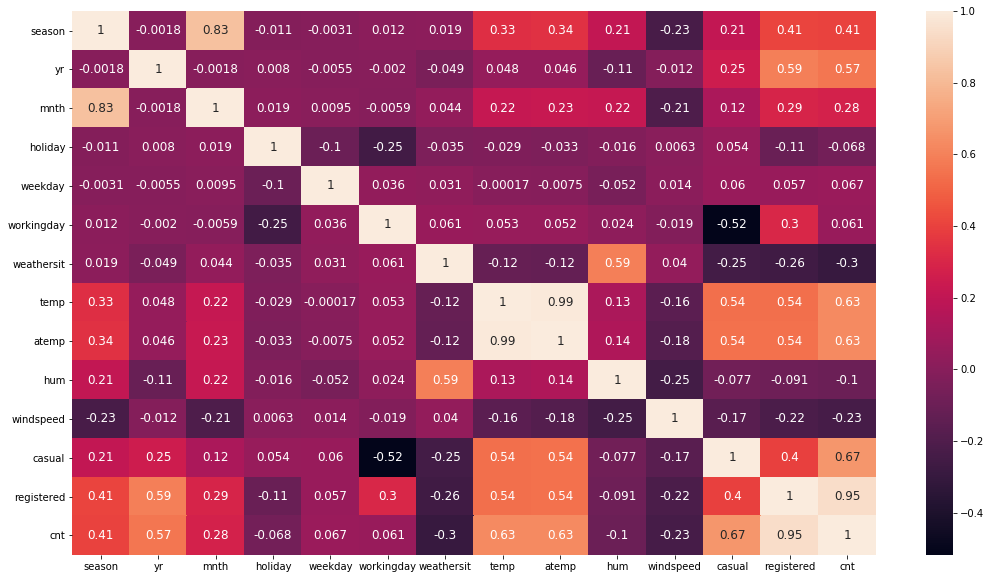

In [80]:
corrmat = df.corr()

fig, ax = plt.subplots(figsize = (18,10))

sns.heatmap(corrmat, annot = True, annot_kws = {'size' : 12})

### Feature Engineering

In [84]:
df_feature = df[['season','yr','temp','atemp','casual','registered', 'cnt']]
df_feature

,season,yr,temp,atemp,casual,registered,cnt
0,1,0,0.344167,0.363625,331,654,985
1,1,0,0.363478,0.353739,131,670,801
2,1,0,0.196364,0.189405,120,1229,1349
3,1,0,0.200000,0.212122,108,1454,1562
4,1,0,0.226957,0.229270,82,1518,1600
...,...,...,...,...,...,...,...
726,1,1,0.254167,0.226642,247,1867,2114
727,1,1,0.253333,0.255046,644,2451,3095
728,1,1,0.253333,0.242400,159,1182,1341
729,1,1,0.255833,0.231700,364,1432,1796


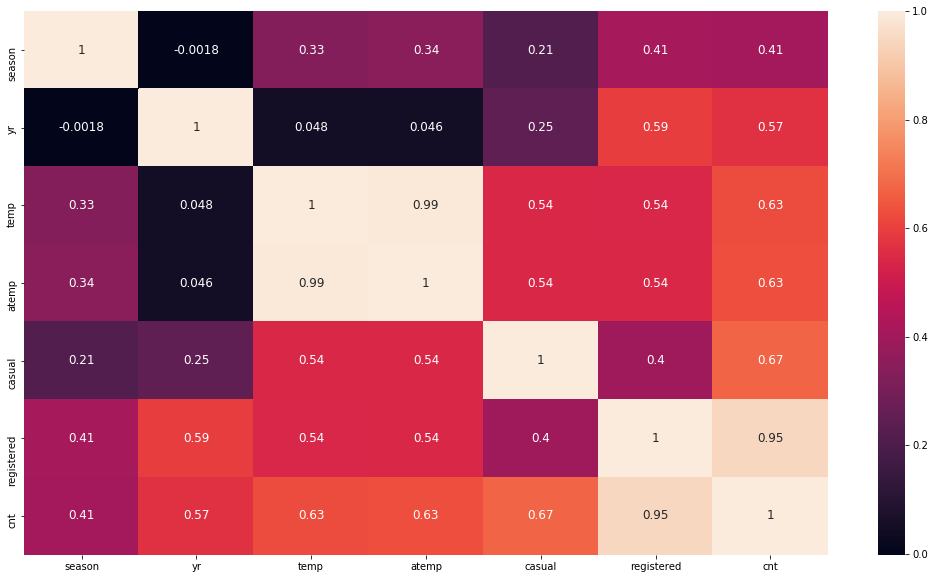

In [88]:
corrmat1 = df_feature.corr()

fig, ax = plt.subplots(figsize = (18,10))

sns.heatmap(corrmat1, annot = True, annot_kws = {'size' : 12})

In [87]:
X = df_feature.drop(['cnt'], axis = 1)
y = df_feature['cnt']

X.shape , y.shape

((731, 6), (731,))

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)



In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

data = pd.DataFrame(data = [y_predict,y_test])
data.T

,0,1
0,5923.0,5923.0
1,4592.0,4592.0
2,1248.0,1248.0
3,1360.0,1360.0
4,4075.0,4075.0
...,...,...
237,5115.0,5115.0
238,4911.0,4911.0
239,3331.0,3331.0
240,1096.0,1096.0


### Checking Predicted vs Measured Values

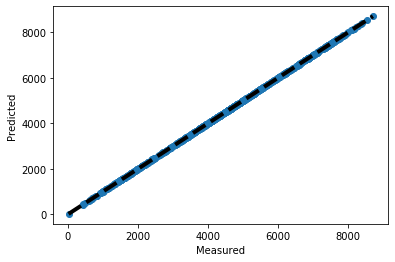

In [97]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, y, cv = 10 )


fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

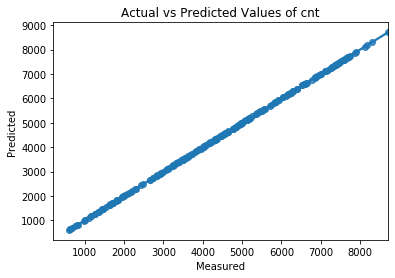

In [98]:
#other method

ax = sns.regplot(y_test, y_predict)
ax.set(title = "Actual vs Predicted Values of cnt")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


### Mean Squared Error (MSE)

In [96]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)

print('mse : ', mse)

mse :  7.51875559369933e-25
